
<a name="T_D48C173C"></a>
# <span style="color:rgb(213,80,0)">Using Signal Designer and Signal Source Block Library</span>

[**Signal Designer**](SignalDesigner.m) lets you define a signal trace using simple parameterization scheme to define the shape of a signal. Signal Designer can create the following three types of signals.

-  **Continuous multi-step signal** is a signal trace consisting of smoothly connected flat segments.
-  **Continuous signal** is a smooth signal trace.
-  **Piece-wise constant signal** is a signal trace consisting of constant segments that are connected with discrete jumps.

Accompanying [**Signal Source Block Library**](SignalSourceBlockLibrary) provides four blocks to generate signals in Simulink: **Continuous Multi-Step block**, **Continous block**, **Piece-Wise Constant block**, and **Trace Generator block**. These blocks internally use Signal Designer.


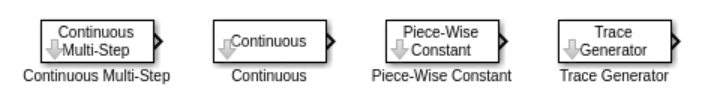


This Live Script describes each block and shows example uses of Signal Designer in MATLAB.

<a name="beginToc"></a>
## Table of Contents
[Continuous Multi-Step](#H_B8D9F8D4)

[Continuous](#H_6CEACC67)

[Piece-Wise Constant](#H_53999B69)

[Trace Generator](#H_7D36F555)

<a name="endToc"></a>
<a name="H_B8D9F8D4"></a>
## Continuous Multi-Step

Continuous Multi-Step block has two parameters:

<p style="text-align:left">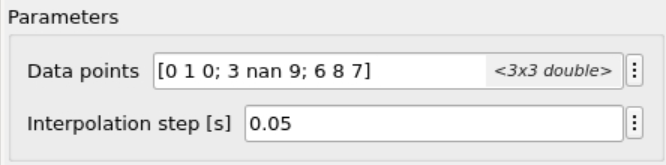</p>


Data points parameter (N-by-3 matrix) and Interpolation step parameter correspond to XYData and DeltaX below, respectively.


Create a Signal Designer object for a continuous multi-step signal trace.


In [1]:
smoothSignal = SignalDesigner("ContinuousMultiStep");


Set an N-by-3 matrix for data points characterizing a continuous signal trace. In each row, a flat segment starts from first column and ends at second column in X (horizontal) axis. In Continuous Multi-Step block, X axis represents time. Third column defines a constant value in Y (vertical) axis. Second column can be NaN, in which case third column defines a value at point (X, Y).


In [2]:
smoothSignal.XYData = [
  0    1  0 ;   ... a flat segment from 0 to 1 in X, of value 0 in Y
  3  nan  9 ;   ... a point at 3 in X, of value 9 in Y
  6    8  7 ];    % a flat segment from 6 to 8 in X, of value 7 in Y


Set a resolution of interpolation.


In [3]:
smoothSignal.DeltaX = 0.05;


Call the update function to generate a signal trace data set in the Signal Designer object.


In [4]:
update(smoothSignal)


As an example, let's see the first 5 rows. Notice that the first and second rows are the start and end of a flat segment, and there is no data point in between although interpolation resolution 0.05 is smaller than the distance in X between first and second rows (which is 1). This is because Signal Designer removed redundant intermediate data points after interpolation. This data point optimization helps reduce the final data size, especially when there are more flat segments than non-flat segments in the trace.


In [5]:
disp(smoothSignal.Data(1:5, :))

     X         Y    
    ____    ________
       0           0
       1           0
1.05    0.016594
2. 1     0.06525
3. 15     0.14428


Use plotDataPoints function to see how data points were converted to a smooth signal trace.



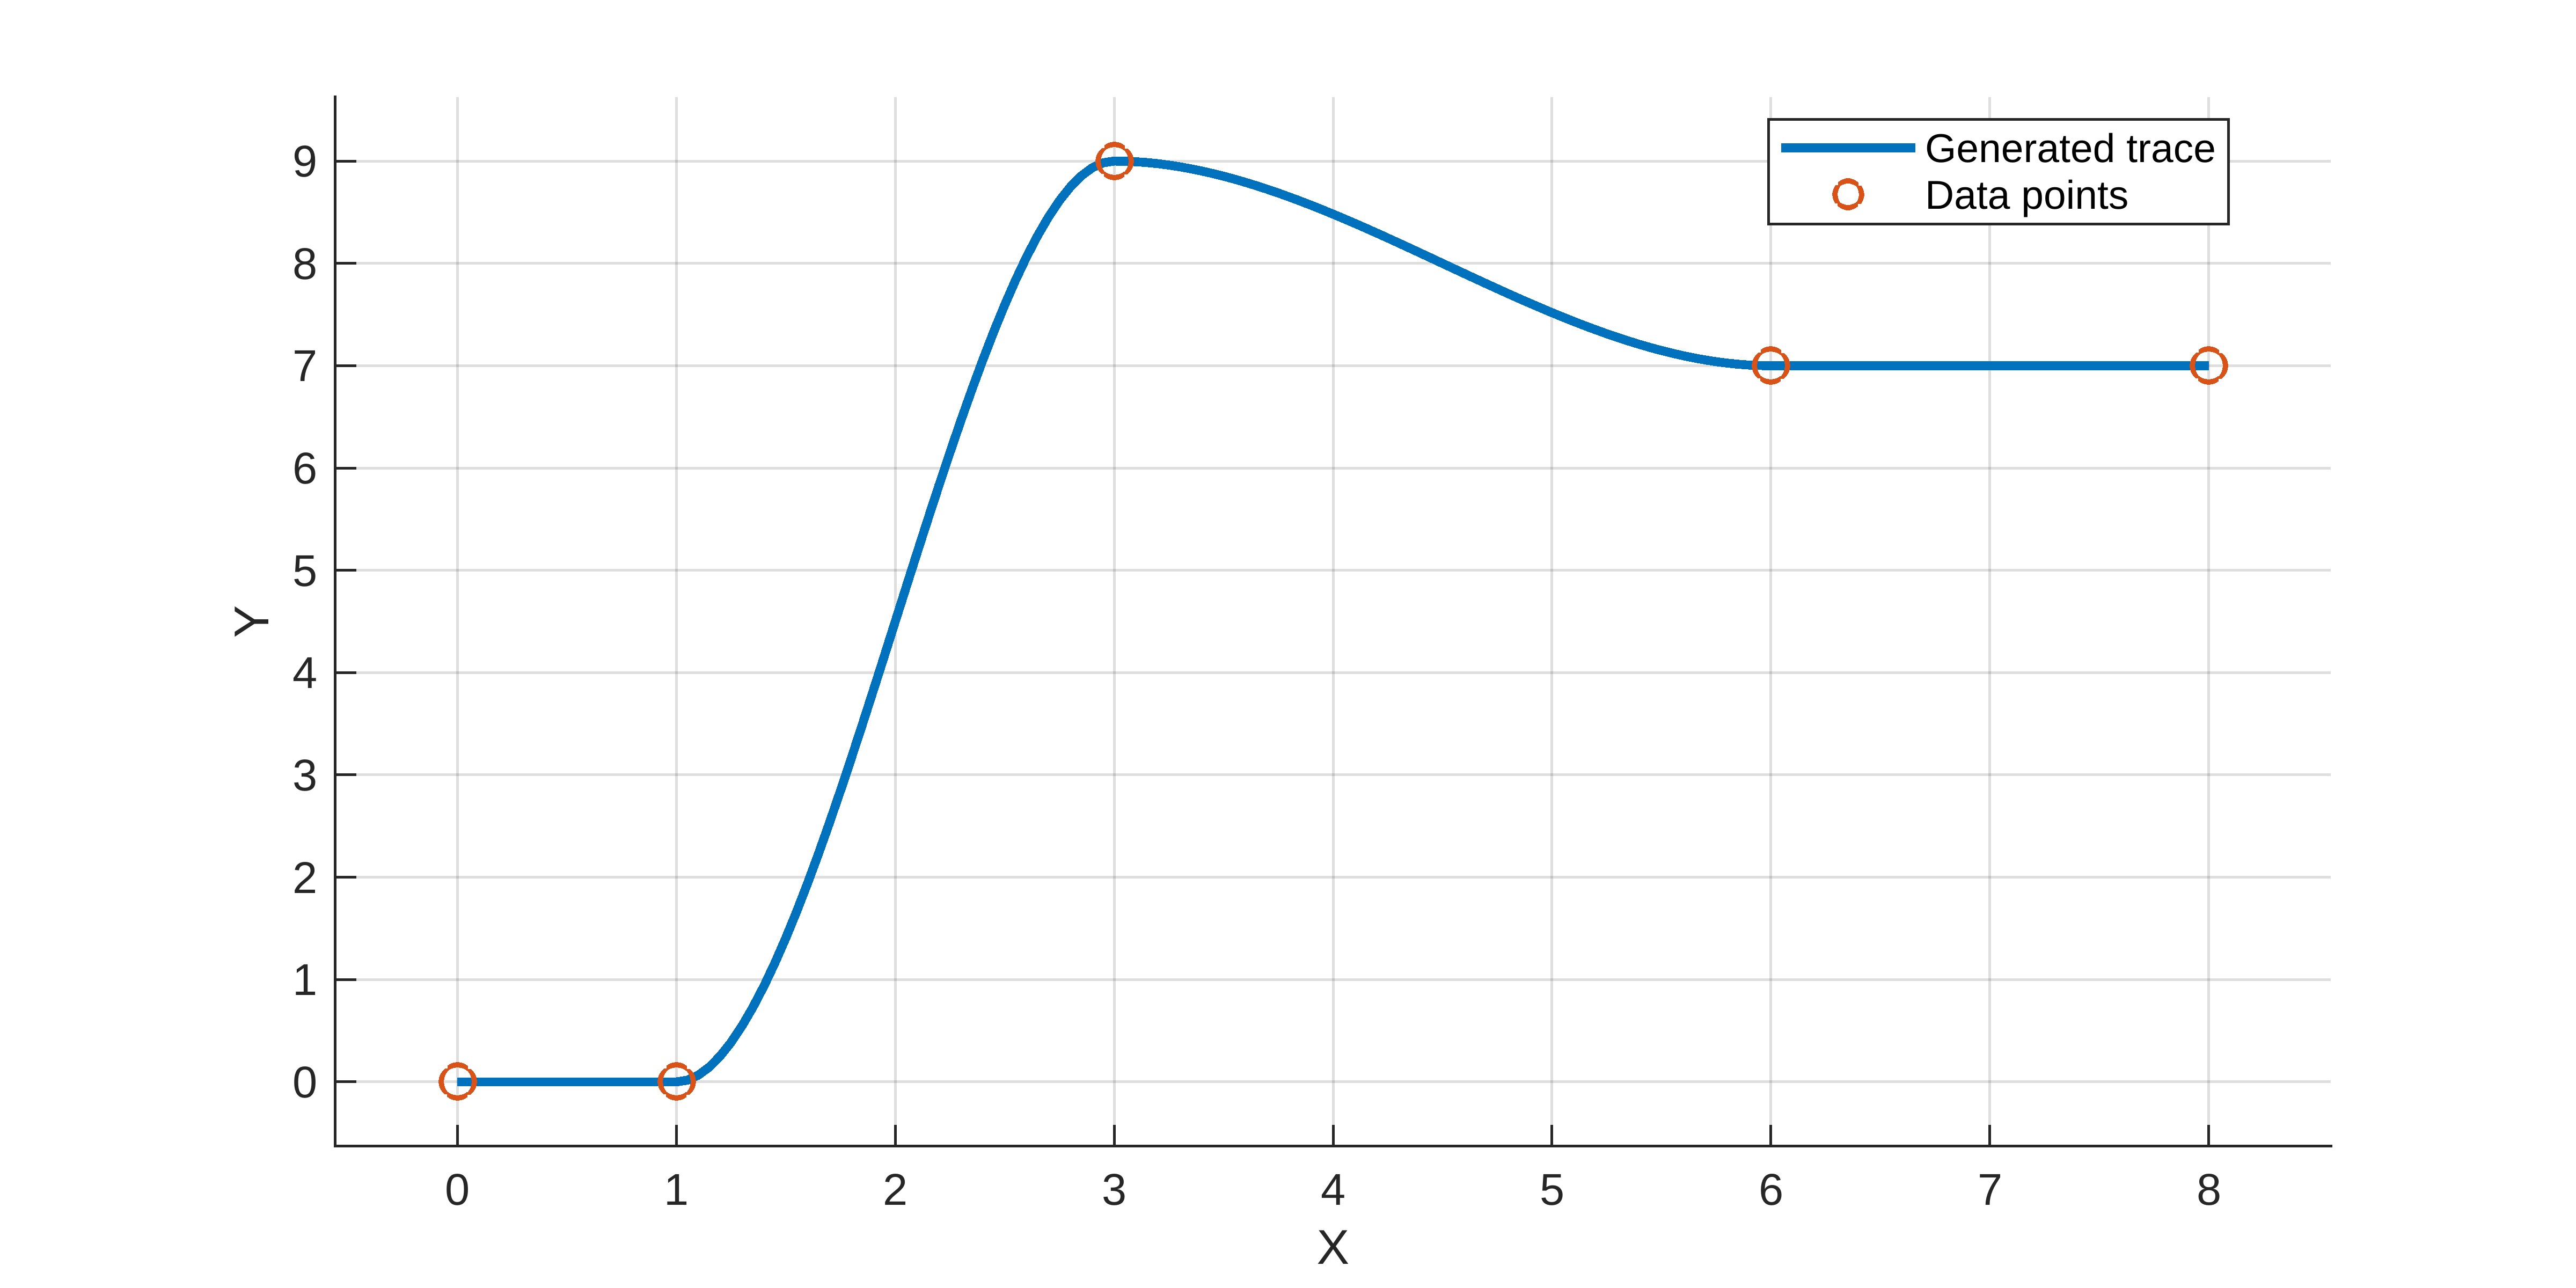

In [6]:
plotDataPoints(smoothSignal);


A Signal Designer object has properties which you can modify.



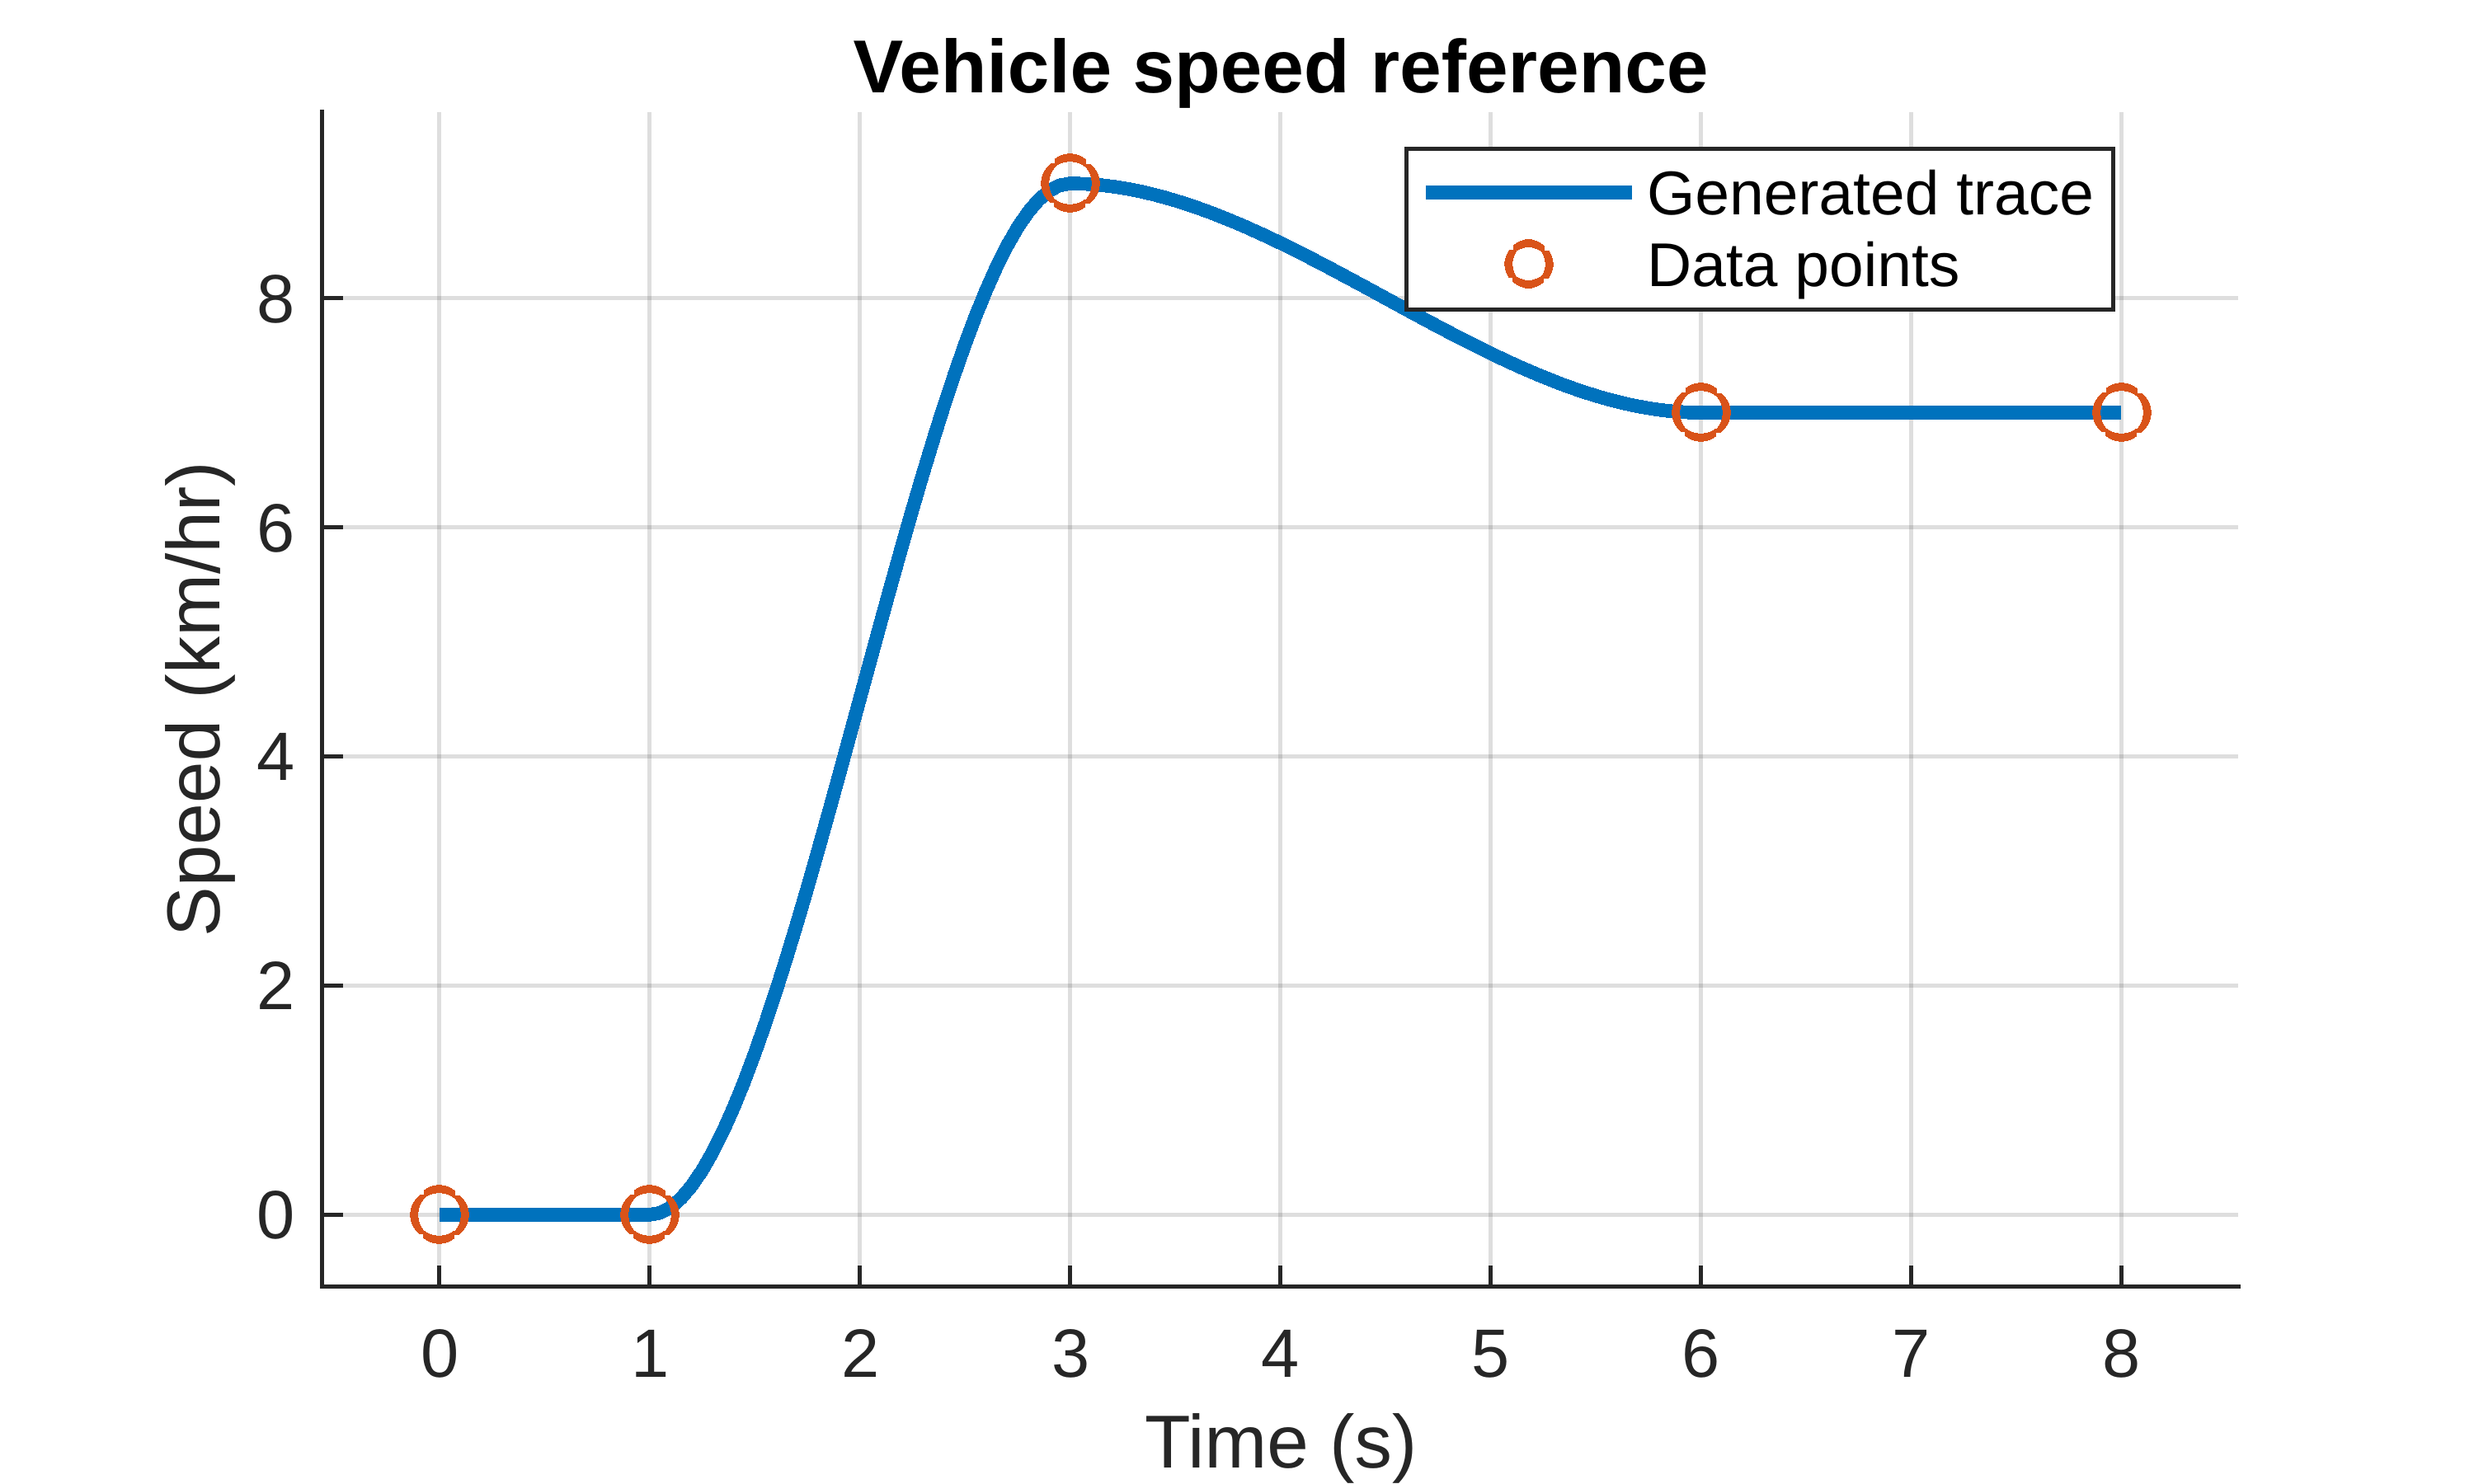

In [7]:
smoothSignal.XName = "Time";
smoothSignal.XUnit = "s";

smoothSignal.YName = "Speed";
smoothSignal.YUnit = "km/hr";

smoothSignal.Title = "Vehicle speed reference";

% Make sure to call update to reflect new property values.
update(smoothSignal)

% Figure object is returned.
fig = plotDataPoints(smoothSignal);
fig.Position(3:4) = [500 300];  % width height

<a name="H_6CEACC67"></a>
## Continuous

Continuous block has two parameters:

<p style="text-align:left">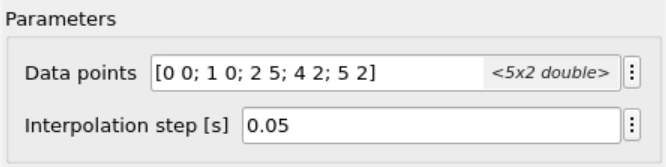</p>


Data points parameter (N-by-2 matrix) and Interpolation step parameter correspond to XYData and DeltaX below, respectively.


Create a Signal Designer object for a continuous signal trace.


In [8]:
smoothSignal = SignalDesigner("Continuous");


Set an N-by-2 matrix for data points characterizing a continuous signal trace. In each row, first element and second element are X and Y values, respectively, defining a point (X, Y). In Continuous block, X axis represents time. For smoothing, X is treated as an independent variable. Y is treated as a function of X.


In [9]:
smoothSignal.XYData = [
  0 0 ;  ... (0, 0)
  1 0 ;  ... (1, 0)
  2 5 ;  ... (2, 5)
  4 2 ;  ... (4, 2)
  5 2 ];  %  (5, 2)


Set a resolution of interpolation.


In [10]:
smoothSignal.DeltaX = 0.05;


Call the update function to generate a signal trace data set in the Signal Designer object.


In [11]:
update(smoothSignal)


Visualize the result.



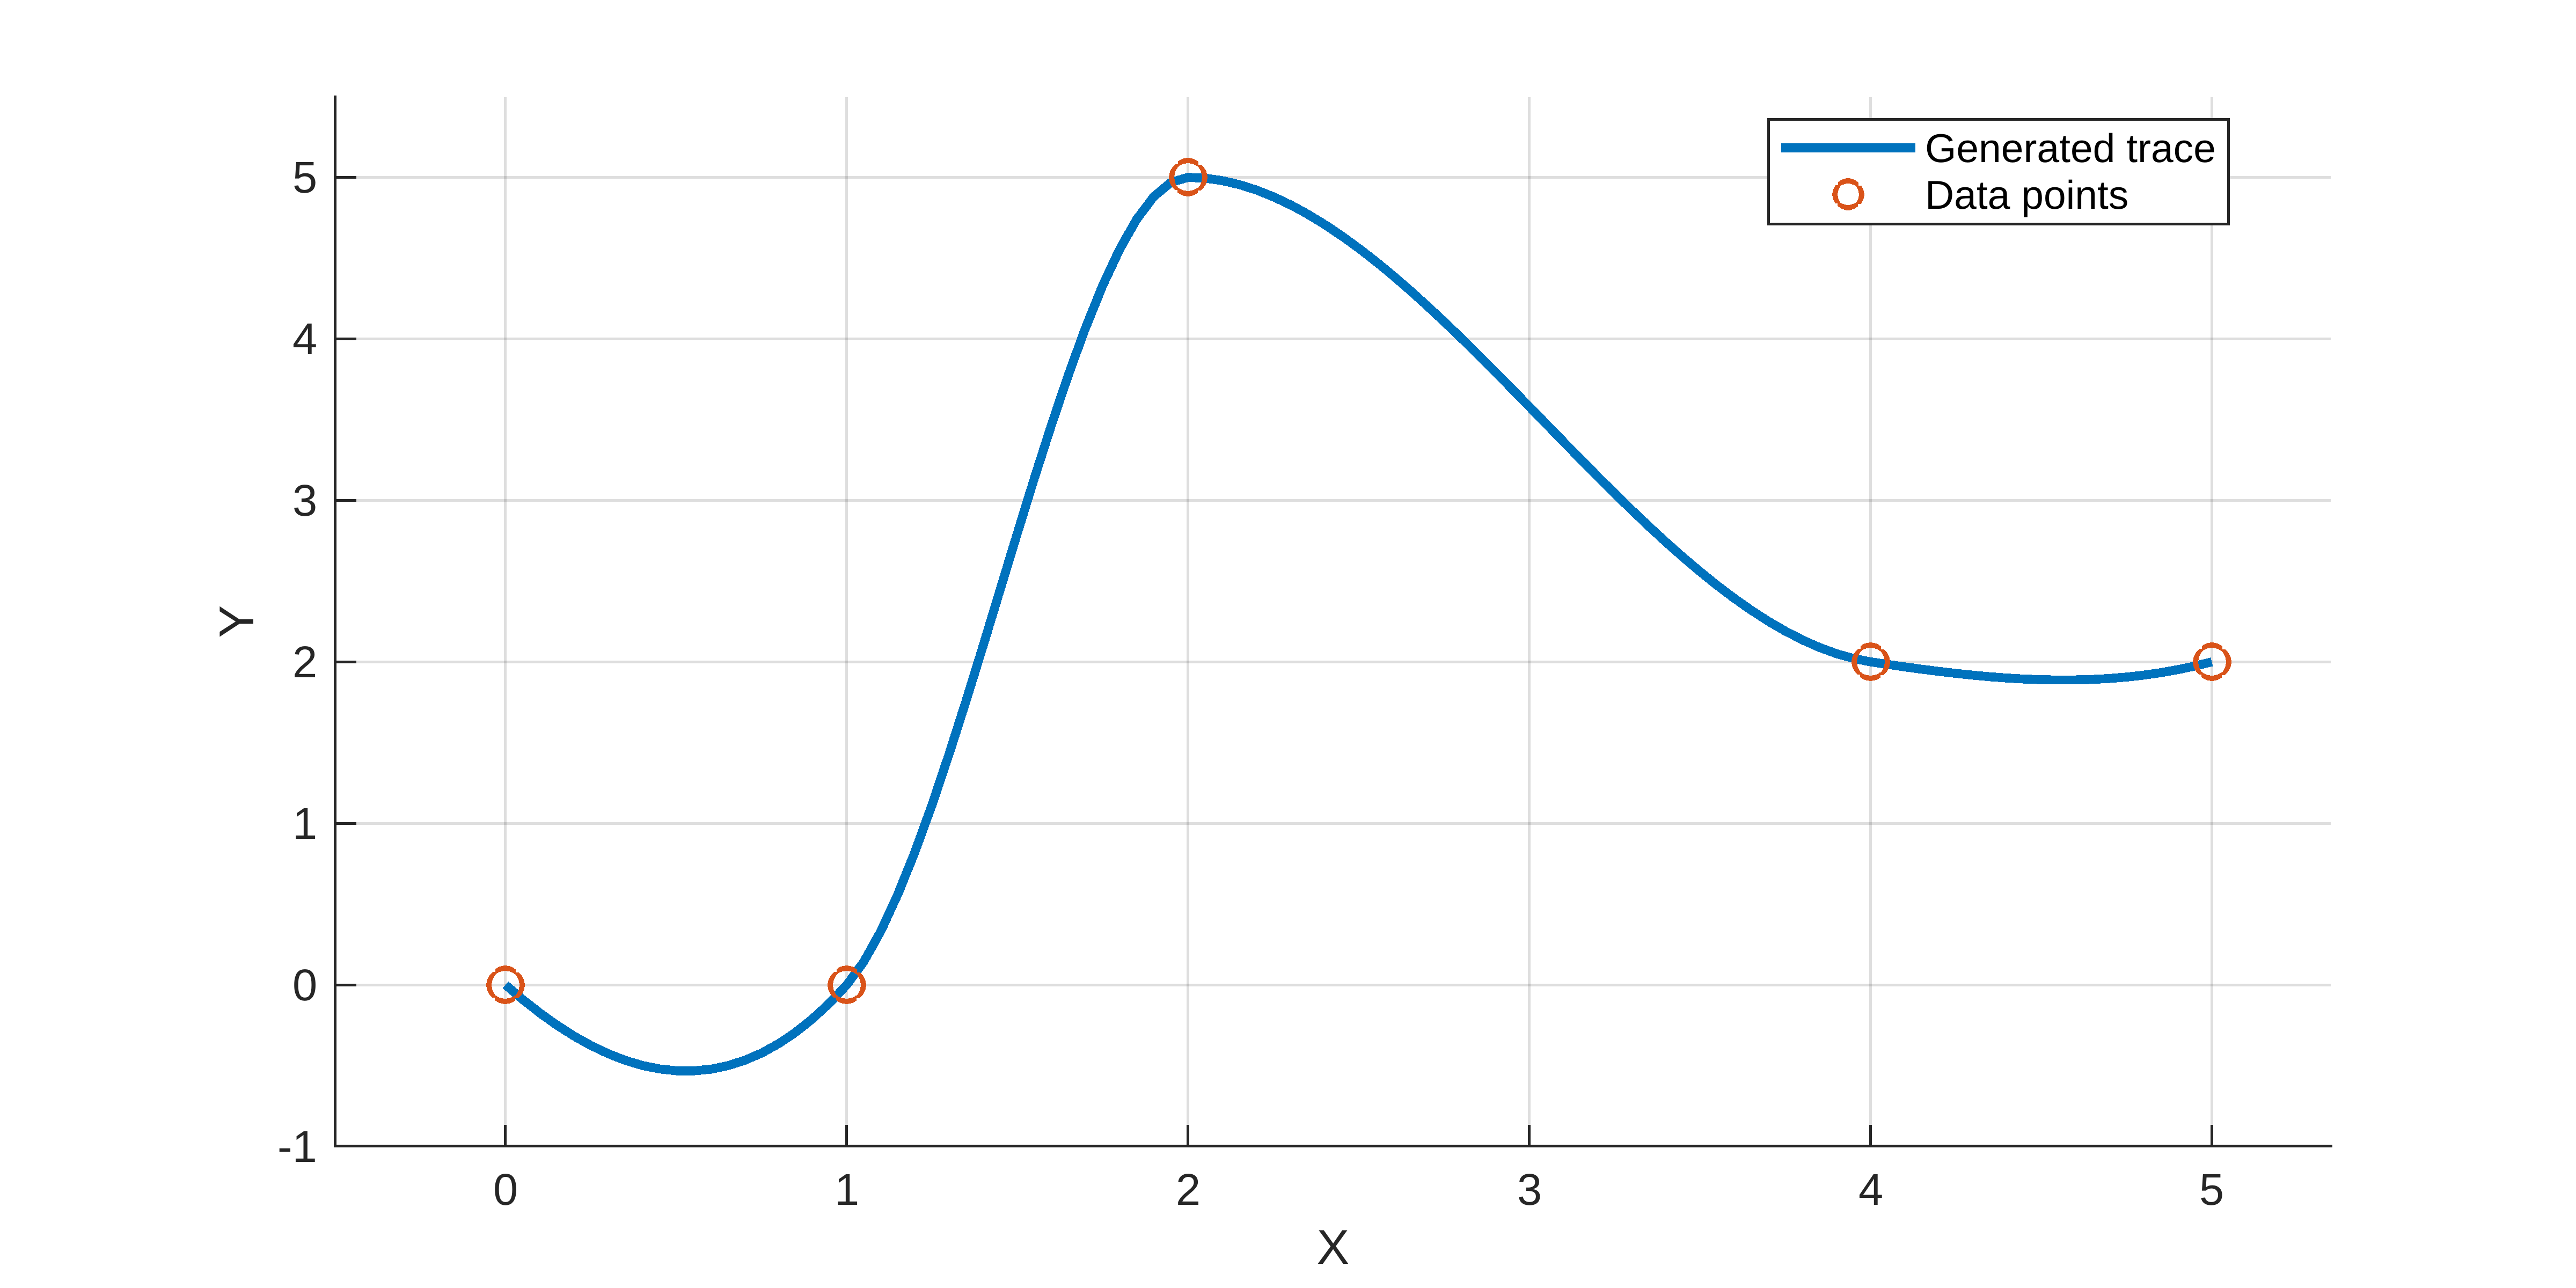

In [12]:
plotDataPoints(smoothSignal);


As you can see, the Continuous signal type does not produce flat segments. However, you can do so by repeating the same Y value in at least three consecutive rows. This is possible because of the interpolation algorithm used which is modified Akima interpolation.



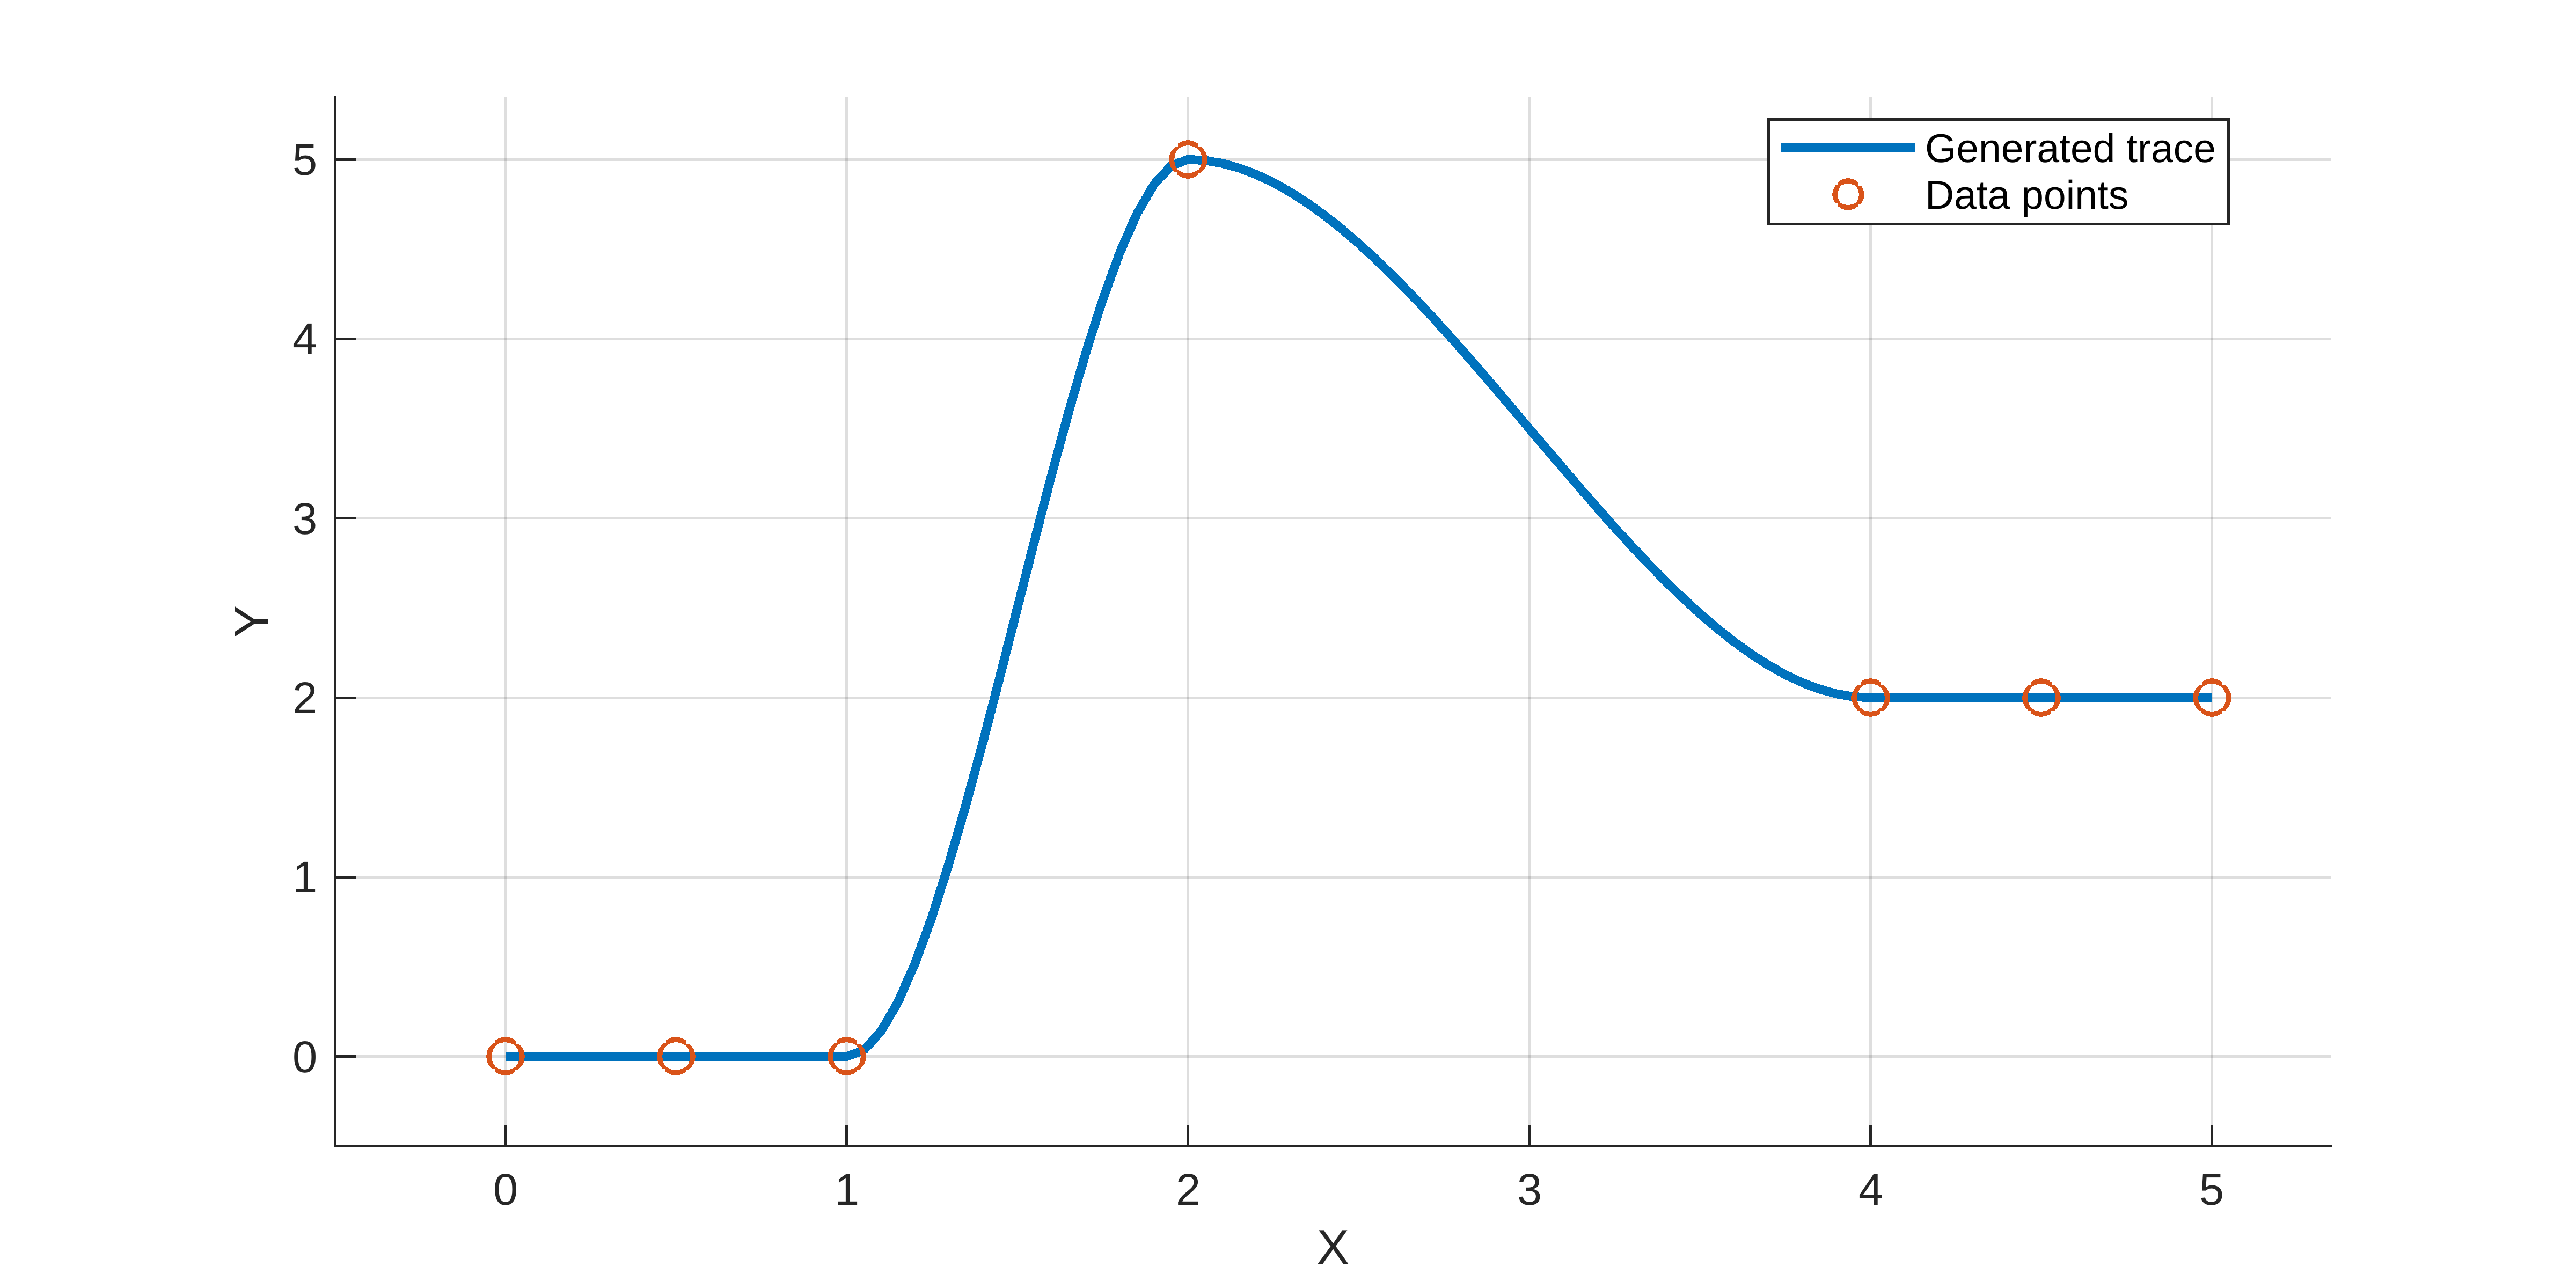

In [13]:
smoothSignal.XYData = [
  0   0 ;
  0.5 0 ;  % Added
  1   0 ;
  2   5 ;
  4   2 ;
  4.5 2 ;  % Added
  5   2 ];
update(smoothSignal)
plotDataPoints(smoothSignal);


You can use Continuous type in place of Continuous Multi-Step type if you can specify flat segments explicitly as presented here. However, unlike Continuous Multi-Step type, redundant data points in flat segments are not removed in Continuous type because there is not enough information to do so robustly.

<a name="H_53999B69"></a>
## Piece-Wise Constant

Piece-Wise Constant block block has one parameter:

<p style="text-align:left">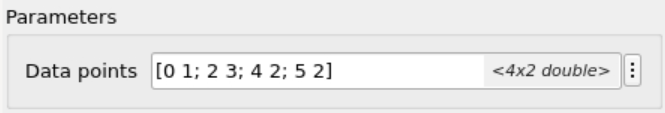</p>


Data points parameter (N-by-2 matrix) corresponds to XYData below.


Create a Signal Designer object to create a picewise constant signal trace.


In [14]:
stepSignal = SignalDesigner("PieceWiseConstant");


Set an N-by-2 matrix for data points characterizing a step signal trace. In each row, first element and second element are X and Y values, respectively, defining a point (X, Y). X is treated as an independent variable. In Piece-Wise Constant block, X axis represents time. Y is treated as a function of X.



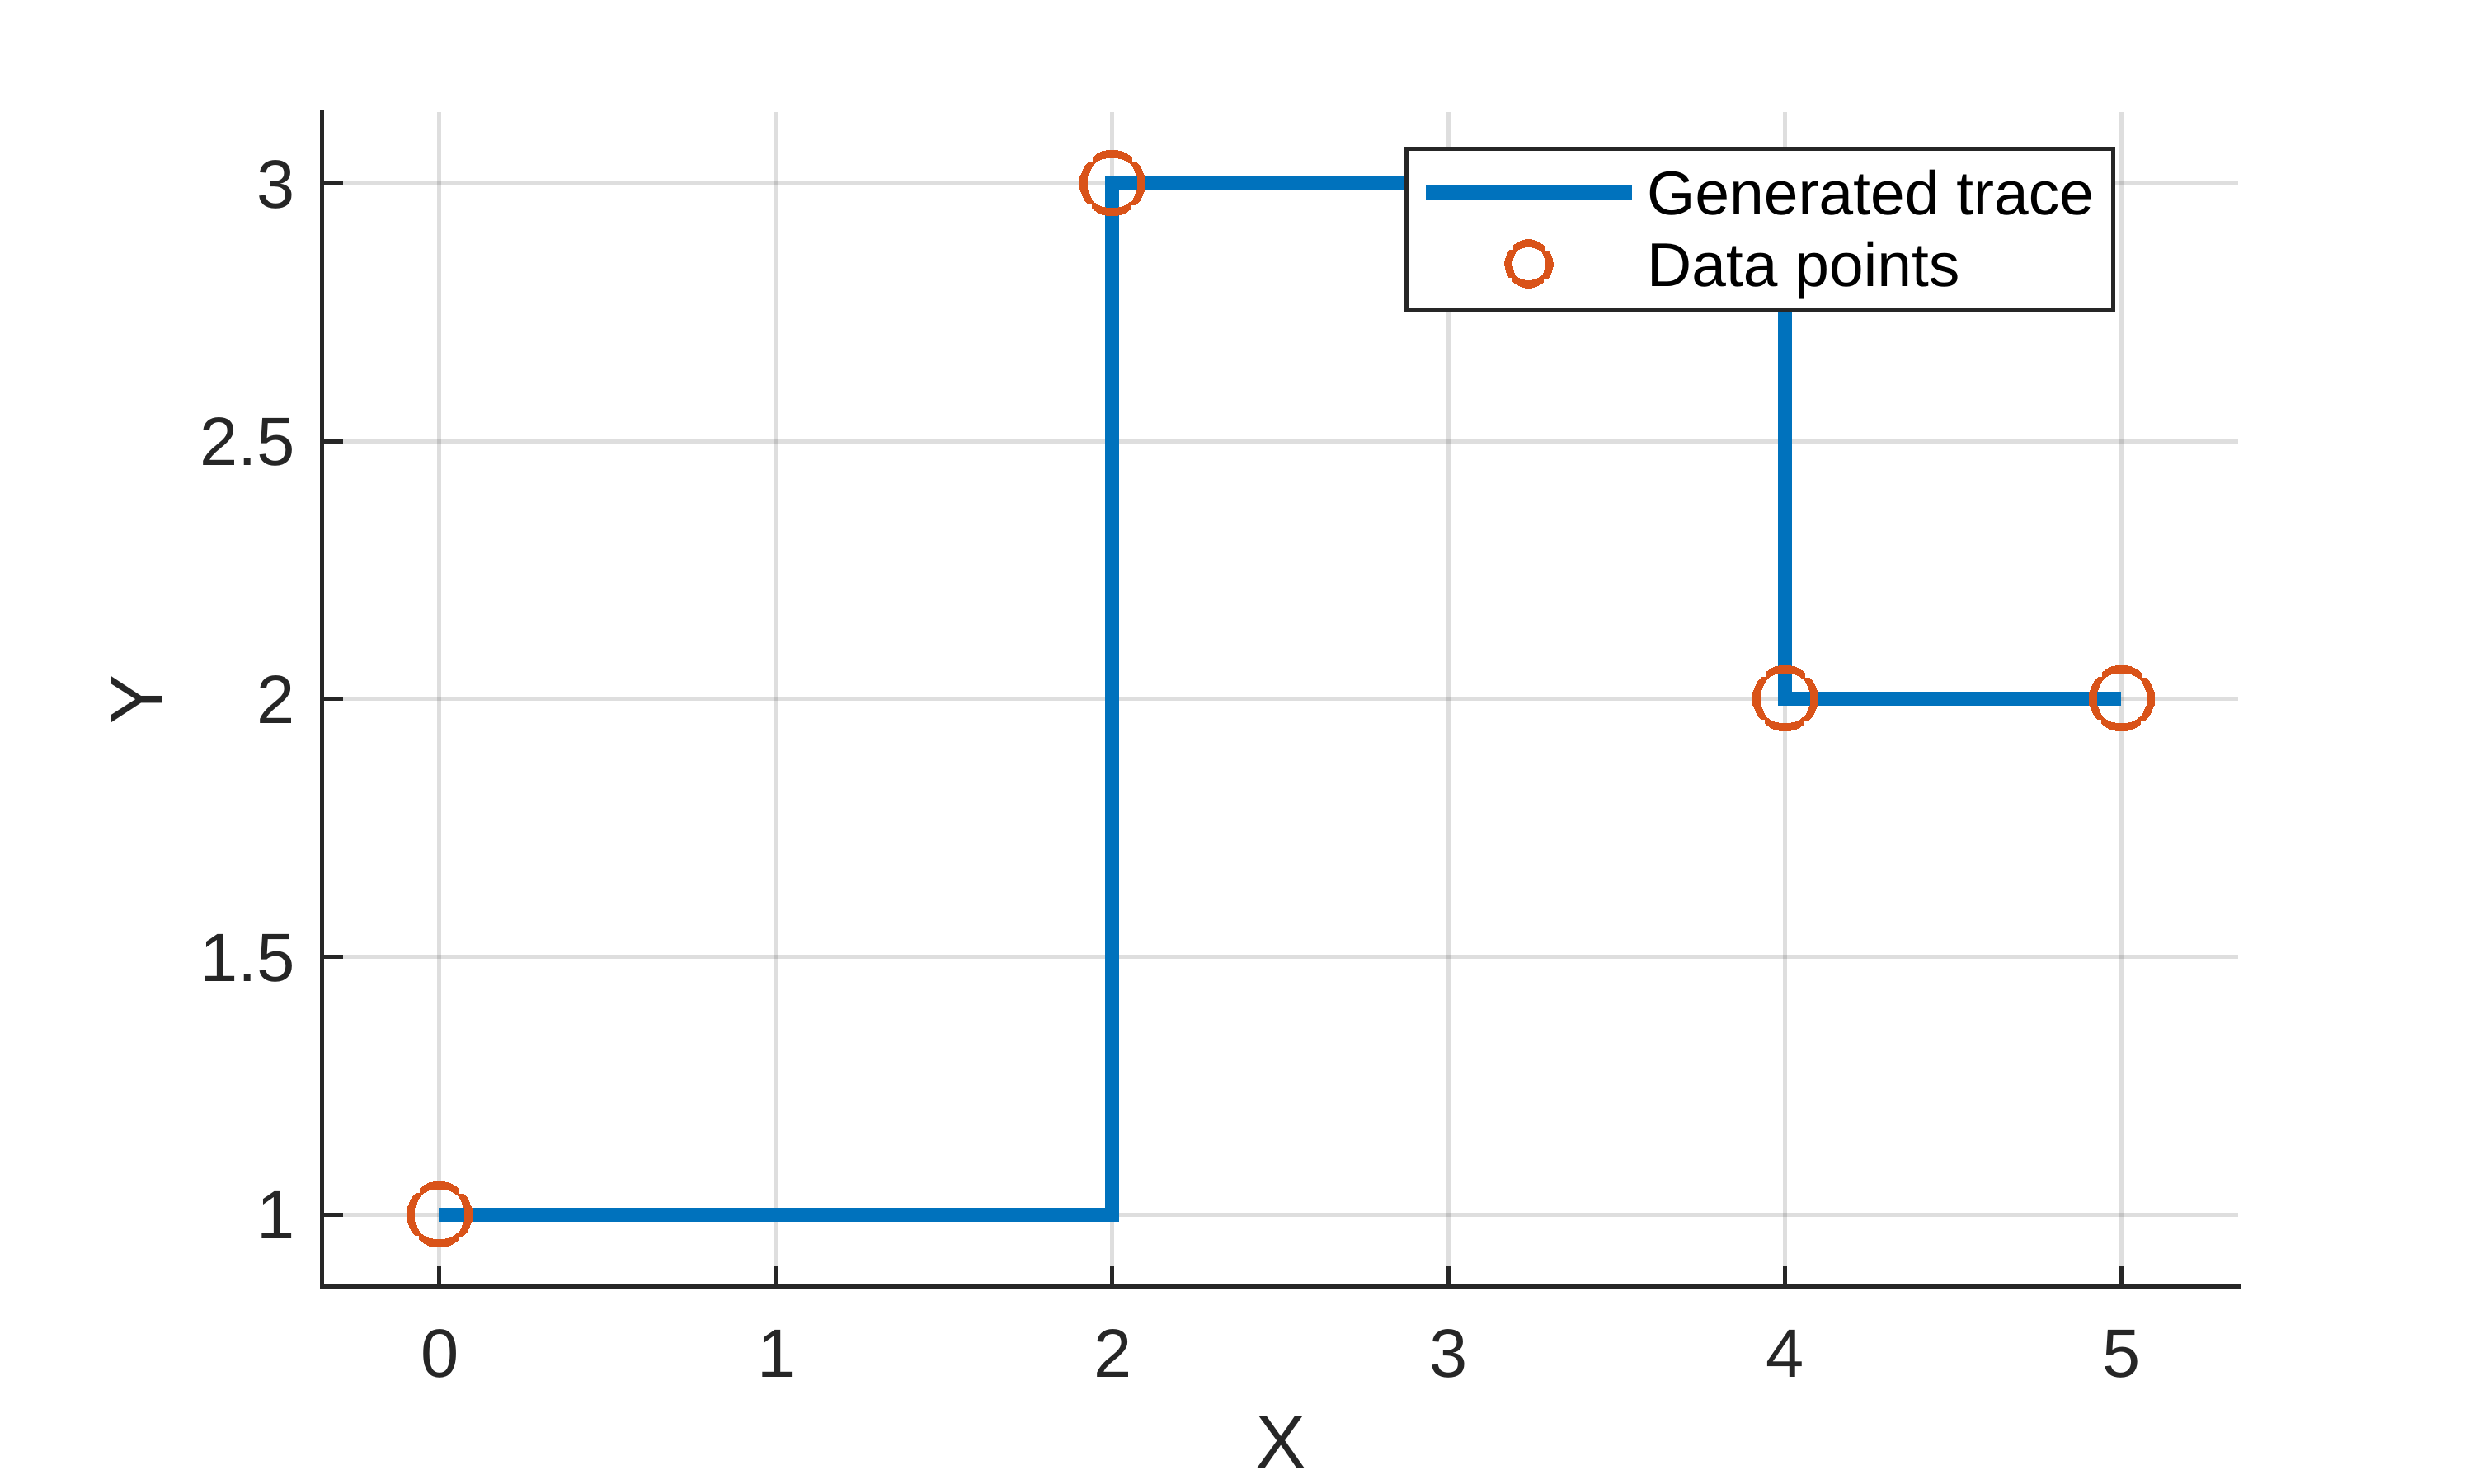

In [15]:
stepSignal.XYData = [
  0  1 ;  ... a constant segment from 0 in X, of value 1 in Y
  2  3 ;  ... a constant segment from 2 in X, of value 3 in Y
  4  2 ;  ... a constnat segment from 4 in X, of value 2 in Y
  5  2 ];   % a constnat segment from 5 in X, of value 2 in Y
update(stepSignal)
fig = plotDataPoints(stepSignal);
fig.Position(3:4) = [500 300];  % width height

<a name="H_7D36F555"></a>
## Trace Generator

Trace Generator block is an application of Continuous Multi-Step block. In Trace Generatgor block, signal trace is parameterized in a higher-level manner than Continuous Multi-Step block, and some parameters are randomized to generate a specific signal trace. The block internally uses <samp>SignalDesignUtility.buildXYData</samp> function in addition to Signal Designer.


Trace Generator block has block parameters as follows.

<p style="text-align:left">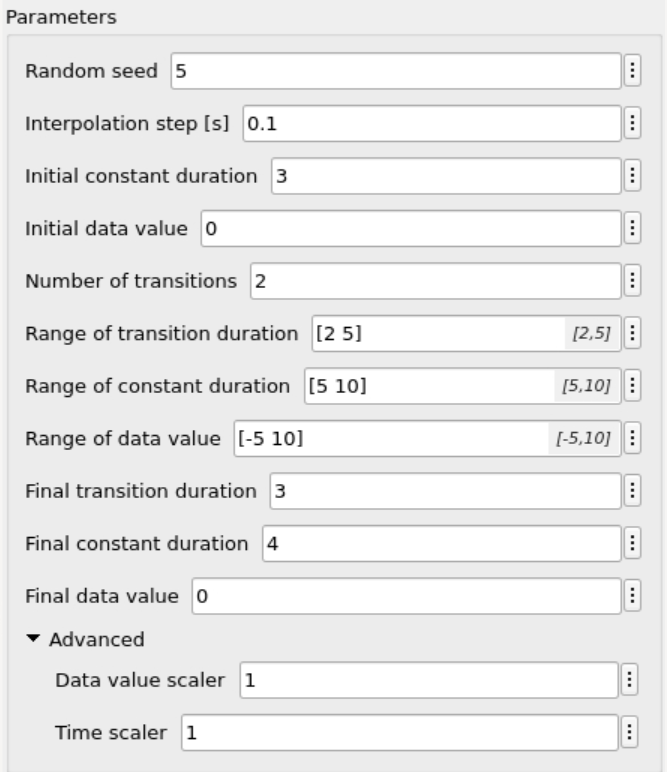</p>


 **Random seed** is used to randomly generate data from other block parameters which Signal Designer can take.


 **Interpolation step** is used to generate Continuous Multi-Step signal trace.


 **Initial constant duration** and  **Initial data value** specify the initial value and duration of signal trace.


**Number of transitions** specifies the number of flat segments excluding the initial and final flat segments.


**Range of transition duration** and  **Range of constant duration** specify value range to generate random numbers for transition and constant durations, respectively.


 **Range of data value** speicifies value range to randomly generate data values.


 **Final transition duration** specifies duration between the final flat segment and the one before.


 **Final constant duration** and  **Final data value** speicify the duration and value of final flat segment, respectively.


 **Advanced** section has parameters as follows.


 **Data value scaler** is used to devide the data value that are normally generated. For example, if Data value scaler parameter is 1000, a data value normally generated to be 1 is converted to 0.001 by the scaler.


**Time scaler** is used to devide the time points normally generated. This works the same way as Data value scaler, but for time.


Code below corresponds to what Trace Generator block does in the block.



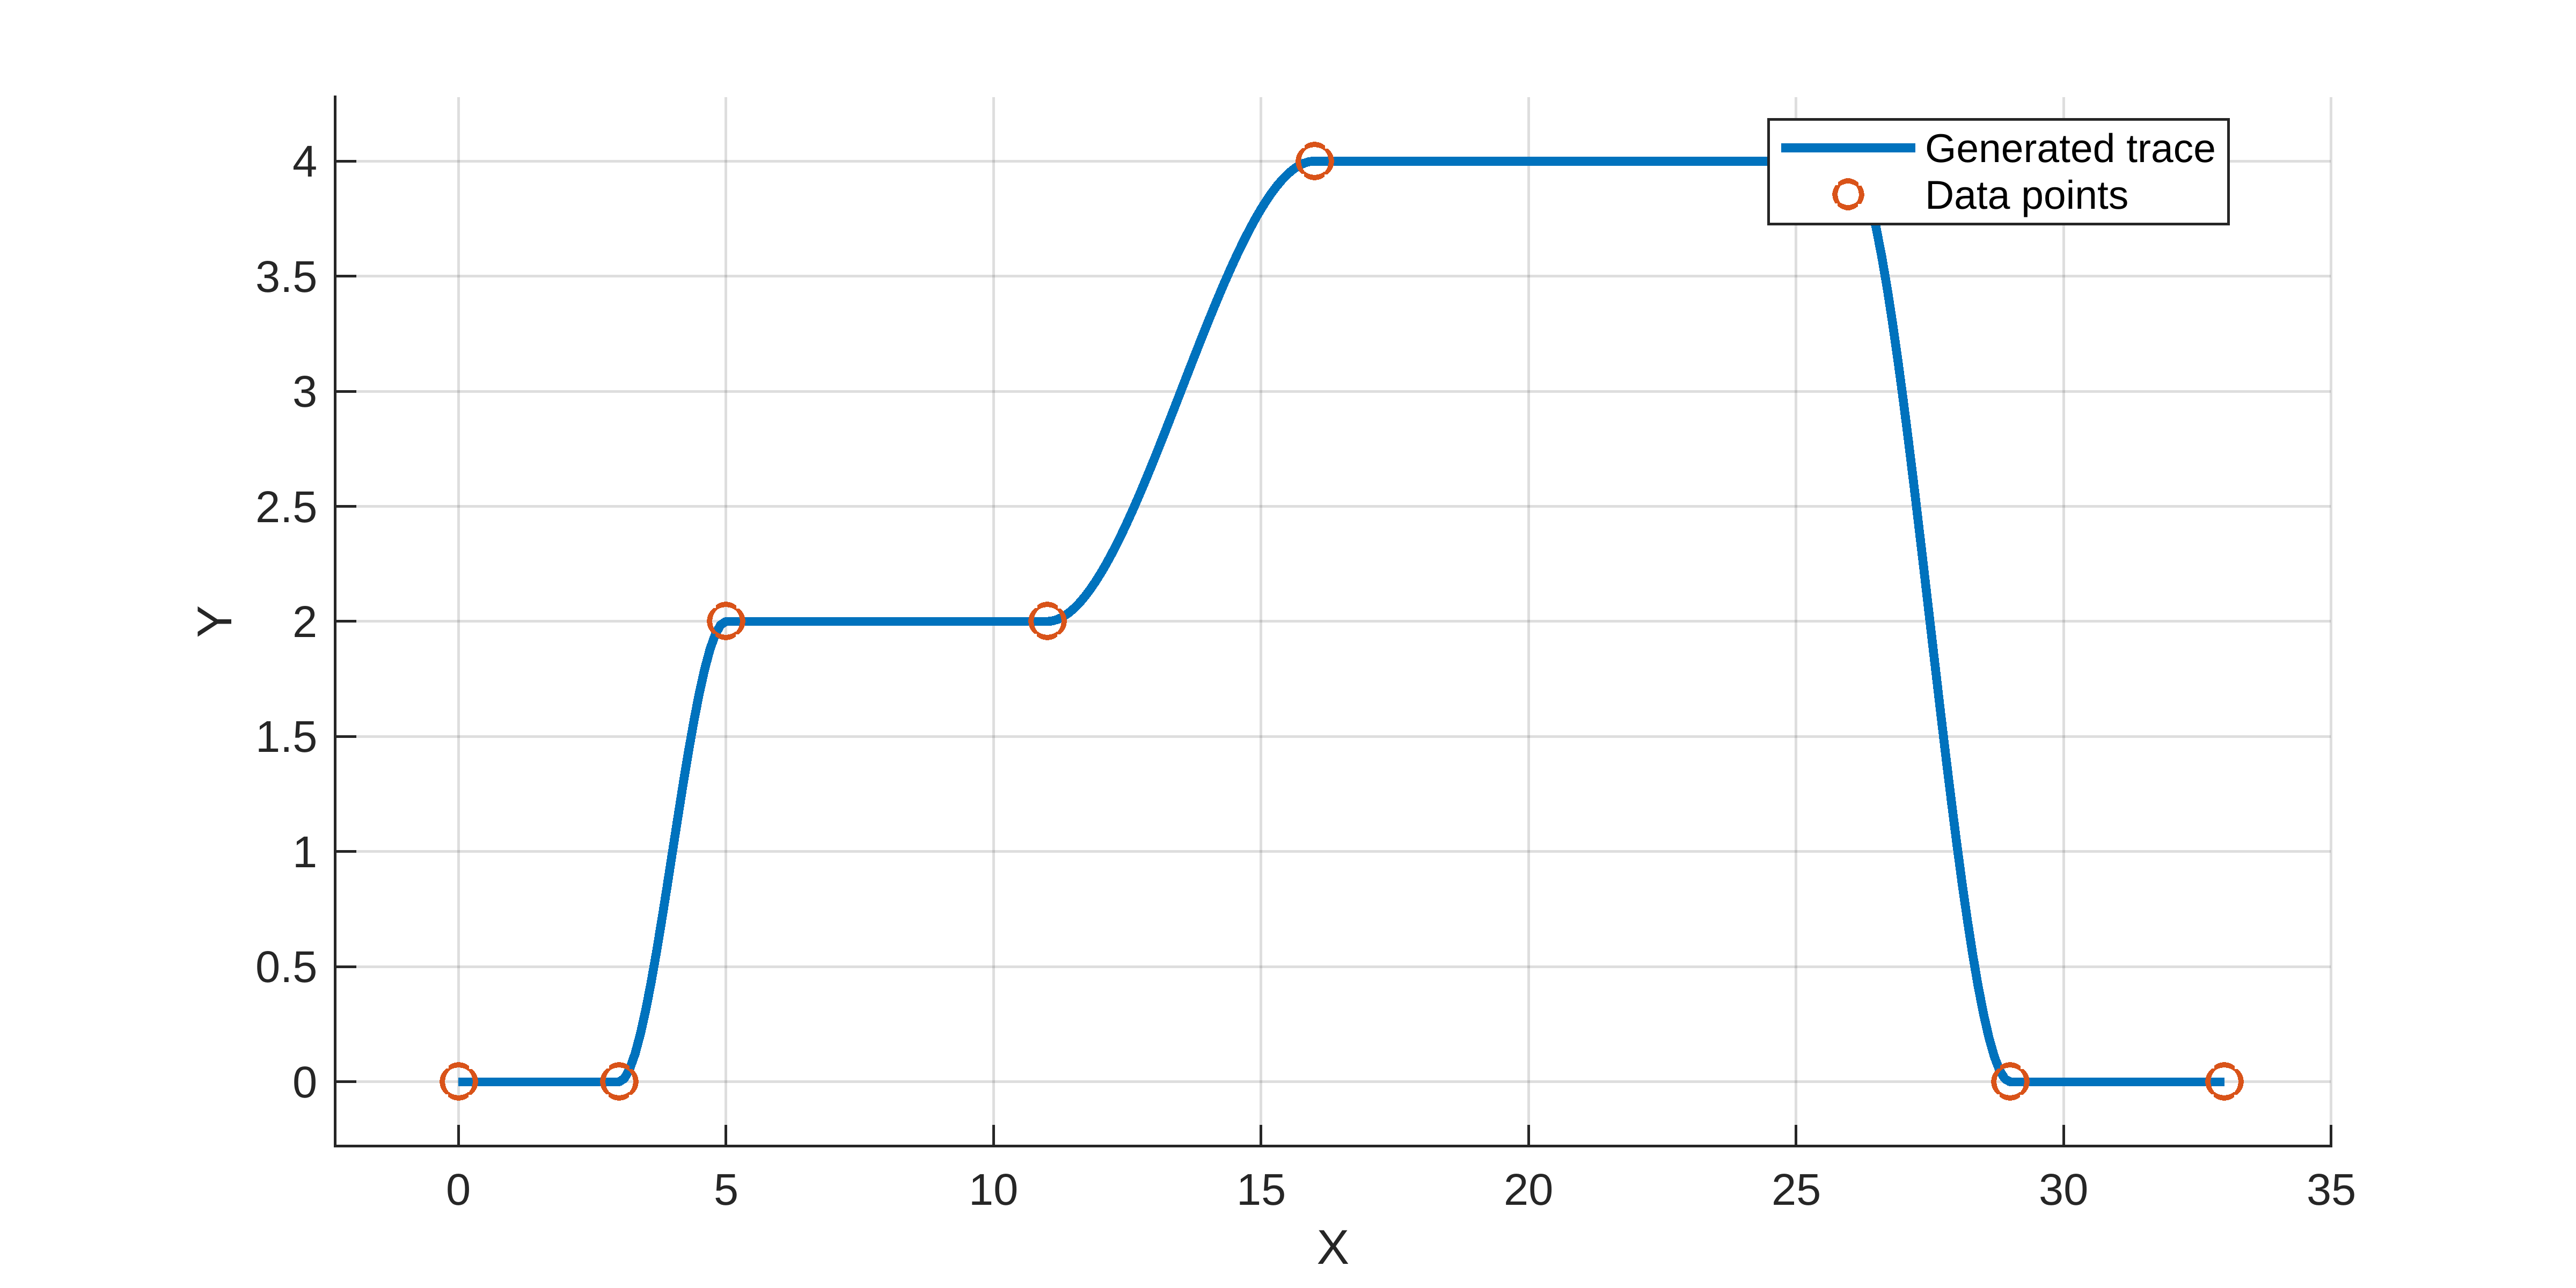

In [16]:
xydata = SignalDesignUtility.buildXYData( ...
  RandomSeed = 5, ... Random seed
  XInitialFlatLength = 3, ... Initial constant duration
  YInitialValue = 0, ...Initial data value
  NumTransitions  = 2, ... Number of transitions
  TransitionRange = [ 2 5 ], ... Range of transition duration
  FlatRange = [ 5 10 ], ... Range of constant duration
  YRange = [ -5 10 ], ... Range of data value
  XFinalTransitionLength = 3, ... Final transition duration
  XFinalFlatLength = 4, ... Final constant duration
  YFinalValue = 0, ... Final data value
  XScale = 1, ... Data value scaler
  YScale = 1 );  % Time scaler

sig = SignalDesigner("ContinuousMultiStep");
sig.XYData = xydata;
sig.DeltaX = 0.1;  % Interpolation step

update(sig)

plotDataPoints(sig);


*Copyright 2022-2023 The MathWorks, Inc.*

